# Context
Insurance companies around the world operate in a very competitive environment. With various aspects of data collected from millions of customers, it is painstakingly hard to analyze and understand the reason for a customer’s decision to switch to a different insurance provider.

For an industry where customer acquisition and retention are equally important, and the former being a more expensive process, insurance companies rely on data to understand customer behavior to prevent retention. Thus knowing whether a customer is possibly going to switch beforehand gives Insurance companies an opportunity to come up with strategies to prevent it from actually happening.

Content
Given are 16 distinguishing factors that can help in understanding the customer churn, your objective as a data scientist is to build a Machine Learning model that can predict whether the insurance company will lose a customer or not using these factors.

You are provided with 16 anonymized factors (feature_0 to feature 15) that influence the churn of customers in the insurance industry

Acknowledgements
Credit goes to:- https://www.machinehack.com/course/insurance-churn-prediction-weekend-hackathon-2/

Inspiration
Build a Machine Learning model that can predict whether the insurance company will lose a customer or not using these factors.

# --------------------------------------------------------------------------------------------------------


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline 

In [2]:
df=pd.read_csv(r"C:\Users\sarkar\Desktop\final\all about projects\churn prediction\insurance churn prediction\data\Insurance_Churn_ParticipantsData\Train.csv")

In [3]:
df.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.276515  -0.424429   1.344997  -0.012283   0.076230   1.076648   
1   0.853573   0.150991   0.503892  -0.979179  -0.569351  -0.411453   
2   0.947747  -0.173832   1.825628  -0.703478   0.076230  -0.411453   
3   0.853573  -0.381404   0.984523  -0.039464  -0.569351  -0.411453   
4   1.324443   1.590527  -1.178318  -0.097711  -0.246560  -0.411453   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0   0.182198          3          0          1           0           0   
1  -0.251940          4          1          2           0           1   
2  -0.251940          6          1          2           0           0   
3  -0.251940          4          0          2           0           1   
4  -0.251940          0          1          1           0           0   

   feature_12  feature_13  feature_14  feature_15  labels  
0           0           0          10           2       1  
1           0           0           0           3       0  
2           0           0           5           3       0  
3           0           0           5           3       0  
4           0           0           8           3       0

In [4]:
df.describe()

feature_0     feature_1     feature_2     feature_3     feature_4  \
count  33908.000000  33908.000000  33908.000000  33908.000000  33908.000000   
mean      -0.004158      0.002584     -0.000213     -0.000053     -0.000298   
std        0.999776      1.014268      1.000872      1.002512      1.003724   
min       -2.159994     -3.081149     -1.779108     -1.002478     -0.569351   
25%       -0.747384     -0.422787     -0.938003     -0.602517     -0.569351   
50%       -0.182341     -0.297324      0.023260     -0.303517     -0.246560   
75%        0.665225      0.022901      0.624050      0.236237      0.076230   
max        5.091402     33.094776      1.825628     18.094700     19.443647   

          feature_5     feature_6     feature_7     feature_8     feature_9  \
count  33908.000000  33908.000000  33908.000000  33908.000000  33908.000000   
mean      -0.004652     -0.007498      4.336381      1.171051      1.225345   
std        0.993984      0.802696      3.273376      0.606730      0.749104   
min       -0.411453     -0.251940      0.000000      0.000000      0.000000   
25%       -0.411453     -0.251940      1.000000      1.000000      1.000000   
50%       -0.411453     -0.251940      4.000000      1.000000      1.000000   
75%       -0.411453     -0.251940      7.000000      2.000000      2.000000   
max        8.127648     23.625644     11.000000      2.000000      3.000000   

         feature_10    feature_11    feature_12    feature_13    feature_14  \
count  33908.000000  33908.000000  33908.000000  33908.000000  33908.000000   
mean       0.018137      0.555503      0.159667      0.639407      5.520497   
std        0.133450      0.496917      0.366303      0.897627      3.003241   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      3.000000   
50%        0.000000      1.000000      0.000000      0.000000      6.000000   
75%        0.000000      1.000000      0.000000      2.000000      8.000000   
max        1.000000      1.000000      1.000000      2.000000     11.000000   

         feature_15        labels  
count  33908.000000  33908.000000  
mean       2.562375      0.116993  
std        0.987148      0.321417  
min        0.000000      0.000000  
25%        3.000000      0.000000  
50%        3.000000      0.000000  
75%        3.000000      0.000000  
max        3.000000      1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   33908 non-null  float64
 1   feature_1   33908 non-null  float64
 2   feature_2   33908 non-null  float64
 3   feature_3   33908 non-null  float64
 4   feature_4   33908 non-null  float64
 5   feature_5   33908 non-null  float64
 6   feature_6   33908 non-null  float64
 7   feature_7   33908 non-null  int64  
 8   feature_8   33908 non-null  int64  
 9   feature_9   33908 non-null  int64  
 10  feature_10  33908 non-null  int64  
 11  feature_11  33908 non-null  int64  
 12  feature_12  33908 non-null  int64  
 13  feature_13  33908 non-null  int64  
 14  feature_14  33908 non-null  int64  
 15  feature_15  33908 non-null  int64  
 16  labels      33908 non-null  int64  
dtypes: float64(7), int64(10)
memory usage: 4.4 MB


### No null values in the data 

# EDA

### Univariate 

In [6]:
df.feature_0.value_counts

<bound method IndexOpsMixin.value_counts of 0       -0.276515
1        0.853573
2        0.947747
3        0.853573
4        1.324443
           ...   
33903    1.701139
33904    1.512791
33905    0.006007
33906   -0.088167
33907    0.947747
Name: feature_0, Length: 33908, dtype: float64>

In [7]:
df.feature_0.describe()

count    33908.000000
mean        -0.004158
std          0.999776
min         -2.159994
25%         -0.747384
50%         -0.182341
75%          0.665225
max          5.091402
Name: feature_0, dtype: float64

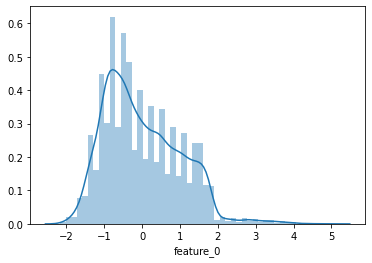

In [8]:
#feature_0 
sns.distplot(df.feature_0 )

In [9]:
df.feature_0.skew()

0.6862668522167714

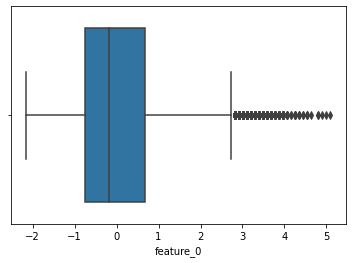

In [10]:
sns.boxplot(df.feature_0 )

# Inference for feature_0 


# ---------------------------------------------------------------------------------------------------------------

In [11]:
#feature_1
df.feature_1.value_counts()

-0.447419    2611
-0.447091     134
-0.446762     125
-0.446106     108
-0.446434     107
             ... 
 0.535262       1
-0.673055       1
 1.161589       1
-0.668785       1
 0.391078       1
Name: feature_1, Length: 6434, dtype: int64

In [12]:
df.feature_1.describe()

count    33908.000000
mean         0.002584
std          1.014268
min         -3.081149
25%         -0.422787
50%         -0.297324
75%          0.022901
max         33.094776
Name: feature_1, dtype: float64

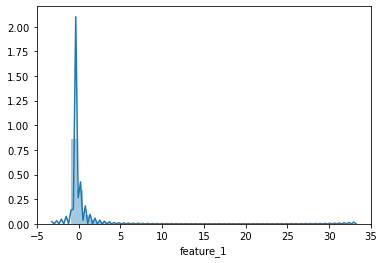

In [13]:
sns.distplot(df.feature_1)

In [14]:
df.feature_1.skew()

8.638637558384437

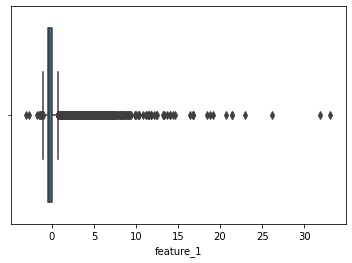

In [15]:
sns.boxplot(df.feature_1)

# Inference for feature_1

# --------------------------------------------------------------------------------------------------------------

In [16]:
#feature_2
feature_2=pd.DataFrame(df.feature_2.value_counts())
feature_2

feature_2
 0.503892       2090
 0.263576       1752
 0.624050       1488
-1.178318       1449
 0.143418       1438
-1.298476       1415
-0.217055       1409
-0.938003       1393
 1.465155       1369
-1.058161       1342
 1.585313       1309
 0.383734       1308
-0.096898       1258
-0.337213       1194
-0.457371       1189
-0.817845       1159
 1.705471       1154
-1.418634       1097
-0.577529       1096
 0.023260       1069
-1.658950        984
 1.344997        874
-1.538792        816
 1.224839        776
 0.864365        688
 0.744208        680
 1.104681        628
 1.825628        489
-0.697687        398
 0.984523        349
-1.779108        248

In [17]:
import plotly.express as px
fig1 = px.bar(feature_2, x=feature_2.index, y='feature_2', height=500,
              title='Stacked Bar Chart - feature_2')

fig1.show()


# Inference for feature_2

# --------------------------------------------------------------------------------------------------------------

In [18]:
#feature_3
df.feature_3.value_counts()

-0.652997     153
-0.520971     146
-0.528737     140
-0.575335     133
-0.621932     133
             ... 
 11.357489      1
 6.437578       1
 4.332927       1
 2.969953       1
 3.043732       1
Name: feature_3, Length: 1482, dtype: int64

In [19]:
df.feature_3.describe()

count    33908.000000
mean        -0.000053
std          1.002512
min         -1.002478
25%         -0.602517
50%         -0.303517
75%          0.236237
max         18.094700
Name: feature_3, dtype: float64

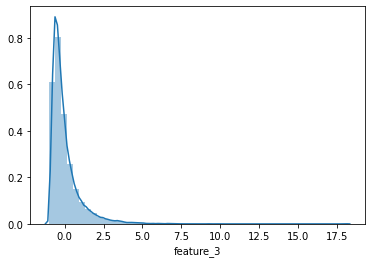

In [20]:
sns.distplot(df.feature_3)

In [21]:
df.feature_3.skew()

3.214662873535

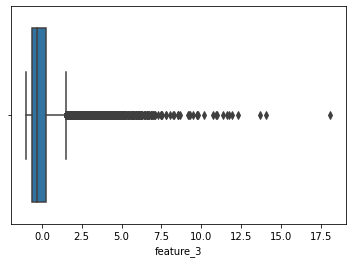

In [22]:
sns.boxplot(df.feature_3)

# Inference for feature_3

# --------------------------------------------------------------------------------------------------------------

In [23]:
#feature_4
feature_4=pd.DataFrame(df.feature_4.value_counts())
feature_4

feature_4
-0.569351       13160
-0.246560        9397
 0.076230        4153
 0.399020        2640
 0.721811        1310
 1.044601         947
 1.367391         541
 1.690181         401
 2.012972         246
 2.335762         210
 2.658552         157
 2.981343         119
 3.304133          94
 3.626923          66
 3.949713          65
 4.272504          57
 4.595294          56
 4.918084          42
 5.240875          33
 5.563665          31
 5.886455          29
 6.209245          21
 6.854826          18
 6.532036          18
 8.145987          13
 8.468777          11
 7.177616          10
 7.500407           8
 9.114358           8
 7.823197           7
 8.791568           5
 9.759939           5
 10.728310          4
 9.437148           4
 10.405519          4
 12.987842          3
 11.373890          3
 15.247374          2
 10.082729          2
 11.051100          1
 12.342261          1
 15.570164          1
 13.956212          1
 13.310632          1
 17.829696          1
 19.443647          1
 16.861325          1

In [24]:
fig1 = px.bar(feature_4, x=feature_4.index, y='feature_4', height=500,color='feature_4',
              title='Stacked Bar Chart - feature_4')

fig1.show()

# Inference for feature_4

# ---------------------------------------------------------------------------------------------------------------

In [25]:
#feature_5
df.feature_5.value_counts()

-0.411453    27752
 1.416214      124
 0.517361      110
 1.426201      101
 0.507374       95
             ...  
 4.941714        1
 7.148897        1
 7.867979        1
 7.278731        1
 7.328668        1
Name: feature_5, Length: 517, dtype: int64

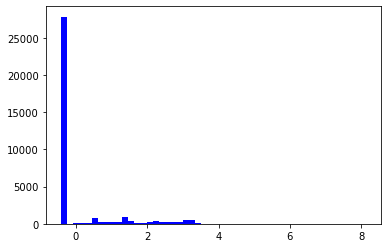

In [26]:
plt.hist(df.feature_5,bins=50,color="b")
plt.show()

# Inference for feature_5

# ---------------------------------------------------------------------------------------------------------------

In [27]:
#feature_6
df.feature_6.value_counts()

-0.251940     27752
 0.182198      2093
 0.616335      1557
 1.050473       851
 1.484611       539
 1.918749       341
 2.352887       209
 2.787025       147
 3.221163        95
 3.655301        71
 4.089439        49
 4.523577        45
 4.957714        30
 5.391852        25
 6.260128        15
 5.825990        14
 7.128404        11
 6.694266         9
 7.996680         7
 8.430818         7
 10.601507        4
 10.167369        4
 9.299093         4
 9.733231         4
 8.864956         4
 12.772197        3
 7.562542         3
 11.469783        3
 12.338059        3
 11.903921        2
 15.811162        2
 23.625644        1
 11.035645        1
 13.640472        1
 16.245300        1
 17.547714        1
Name: feature_6, dtype: int64

In [28]:
feature_6=pd.DataFrame(df.feature_6.value_counts())

In [29]:
fig1 = px.bar(feature_6, x=feature_6.index, y='feature_6', height=500,color='feature_6',
              title='Stacked Bar Chart - feature_6')

fig1.show()

# Inference for feature_6

# --------------------------------------------------------------------------------------------------------------

In [30]:
#feature_7
df.feature_7.value_counts()

1     7286
4     7137
9     5691
0     3891
7     3094
5     1683
6     1164
2     1118
10     988
3      938
8      700
11     218
Name: feature_7, dtype: int64

In [31]:
feature_7=pd.DataFrame(df.feature_7.value_counts())


<ipython-input-32-7655ba74ce16>:2: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



[]

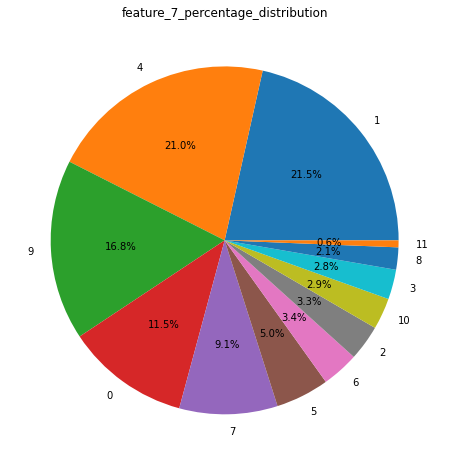

In [32]:
fig,ax=plt.subplots(figsize=(8,8))
plt.pie(feature_7,labels=feature_7.index,
    autopct="%1.1f%%")
plt.title("feature_7_percentage_distribution")
plt.plot()

# Inference for feature_7

# --------------------------------------------------------------------------------------------------------------

In [33]:
#feature_8
df.feature_8.value_counts()

1    20434
2     9637
0     3837
Name: feature_8, dtype: int64

[]

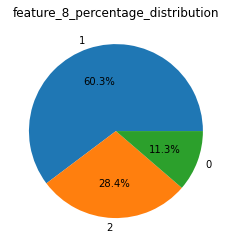

In [34]:
plt.pie([20434,9637,3837],labels=[1,2,0],
    autopct="%1.1f%%")
plt.title("feature_8_percentage_distribution")
plt.plot()

# Inference for feature_8

# ---------------------------------------------------------------------------------------------------------------

In [35]:
#feature_9
df.feature_9.value_counts()

1    17380
2     9974
0     5147
3     1407
Name: feature_9, dtype: int64

In [36]:
feature_9=pd.DataFrame(df.feature_9.value_counts())

<ipython-input-37-75e39fe01946>:2: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



[]

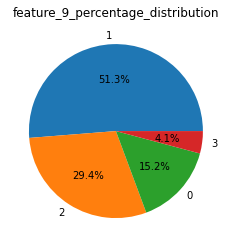

In [37]:
fig,ax=plt.subplots(figsize=(4,4))
plt.pie(feature_9,labels=feature_9.index,
    autopct="%1.1f%%")
plt.title("feature_9_percentage_distribution")
plt.plot()

# Inference for feature_9

# --------------------------------------------------------------------------------------------------------------

In [38]:
#feature_10
df.feature_10.value_counts()

0    33293
1      615
Name: feature_10, dtype: int64

In [39]:
feature_10=pd.DataFrame(df.feature_10.value_counts())

<ipython-input-40-3924ada3b1fa>:2: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



[]

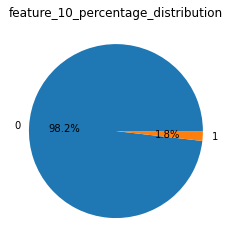

In [40]:
fig,ax=plt.subplots(figsize=(4,4))
plt.pie(feature_10,labels=feature_10.index,
    autopct="%1.1f%%")
plt.title("feature_10_percentage_distribution")
plt.plot()

# Inference for feature_10

# --------------------------------------------------------------------------------------------------------------

In [41]:
#feature_11
df.feature_11.value_counts()


1    18836
0    15072
Name: feature_11, dtype: int64

In [42]:
feature_11=pd.DataFrame(df.feature_11.value_counts())

<ipython-input-43-44fdf8e2303f>:2: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



[]

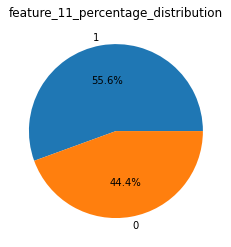

In [43]:
fig,ax=plt.subplots(figsize=(4,4))
plt.pie(feature_11,labels=feature_11.index,
    autopct="%1.1f%%")
plt.title("feature_11_percentage_distribution")
plt.plot()

# Inference for feature_11

# --------------------------------------------------------------------------------------------------------------

In [44]:
#feature_12
df.feature_12.value_counts()

0    28494
1     5414
Name: feature_12, dtype: int64

In [45]:
feature_12=pd.DataFrame(df.feature_12.value_counts())

<ipython-input-46-a18f15f45f8b>:2: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



[]

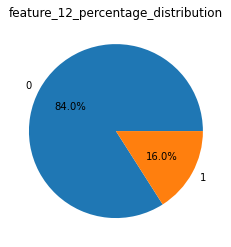

In [46]:
fig,ax=plt.subplots(figsize=(4,4))
plt.pie(feature_12,labels=feature_12.index,
    autopct="%1.1f%%")
plt.title("feature_12_percentage_distribution")
plt.plot()

# Inference for feature_12

# ---------------------------------------------------------------------------------------------------------------

In [47]:
#feature_13
df.feature_13.value_counts()


0    21978
2     9751
1     2179
Name: feature_13, dtype: int64

In [48]:
feature_13=pd.DataFrame(df.feature_13.value_counts())

<ipython-input-49-e8d78f435793>:2: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



[]

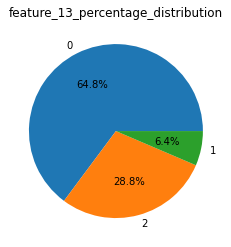

In [49]:
fig,ax=plt.subplots(figsize=(4,4))
plt.pie(feature_13,labels=feature_13.index,
    autopct="%1.1f%%")
plt.title("feature_13_percentage_distribution")
plt.plot()

# Inference for feature_13

# ---------------------------------------------------------------------------------------------------------------

In [50]:
#feature_14
df.feature_14.value_counts()

8     10273
5      5187
1      4672
6      4021
9      3005
0      2193
3      2013
4      1071
10      545
11      427
7       351
2       150
Name: feature_14, dtype: int64

In [51]:
feature_14=pd.DataFrame(df.feature_14.value_counts())

<ipython-input-52-498cd7884f32>:2: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



[]

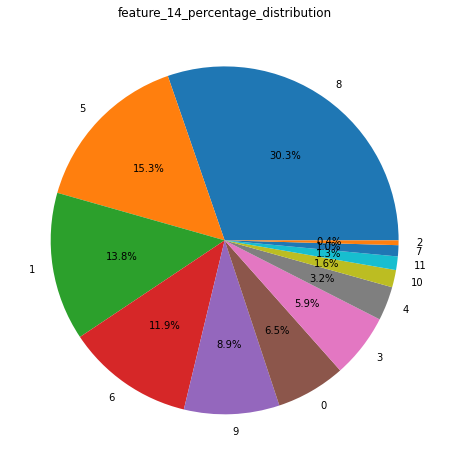

In [52]:
fig,ax=plt.subplots(figsize=(8,8))
plt.pie(feature_14,labels=feature_14.index,
    autopct="%1.1f%%")
plt.title("feature_14_percentage_distribution")
plt.plot()

# Inference for feature_14

# -----------------------------------------------------------------------------------------------------------

In [53]:
#feature_15
df.feature_15.value_counts()

3    27756
0     3661
1     1365
2     1126
Name: feature_15, dtype: int64

In [54]:
feature_15=pd.DataFrame(df.feature_15.value_counts())

<ipython-input-55-e860966d0d8e>:2: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



[]

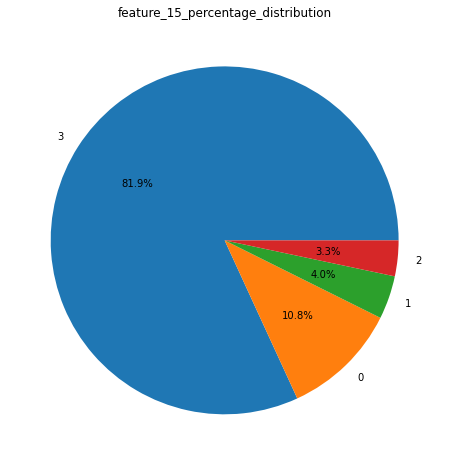

In [55]:
fig,ax=plt.subplots(figsize=(8,8))
plt.pie(feature_15,labels=feature_15.index,
    autopct="%1.1f%%")
plt.title("feature_15_percentage_distribution")
plt.plot()

# Inference for feature_15

# --------------------------------------------------------------------------------------------------------------

In [56]:
#labels
df.labels.value_counts()

0    29941
1     3967
Name: labels, dtype: int64

In [57]:
feature_target=pd.DataFrame(df.labels.value_counts())

<ipython-input-58-30c53550fd0a>:2: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



[]

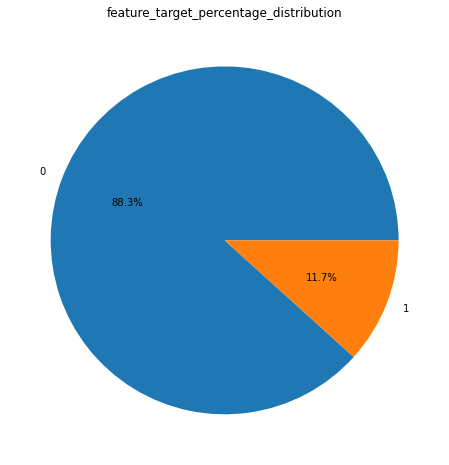

In [58]:
fig,ax=plt.subplots(figsize=(8,8))
plt.pie(feature_target,labels=feature_target.index,
    autopct="%1.1f%%")
plt.title("feature_target_percentage_distribution")
plt.plot()

# Inference for feature_target

# ---------------------------------------------------------------------------------------------------------------

# Bi-virate 

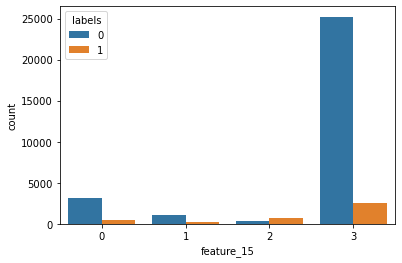

In [59]:
#labels vs feature_15
sns.countplot(df.feature_15,hue=df.labels)

In [60]:
de=df[["feature_15","labels"]]
dd=de.groupby(["feature_15","labels"])['labels'].value_counts()

In [61]:
dd.first

<bound method NDFrame.first of feature_15  labels  labels
0           0       0          3193
            1       1           468
1           0       0          1142
            1       1           223
2           0       0           388
            1       1           738
3           0       0         25218
            1       1          2538
Name: labels, dtype: int64>

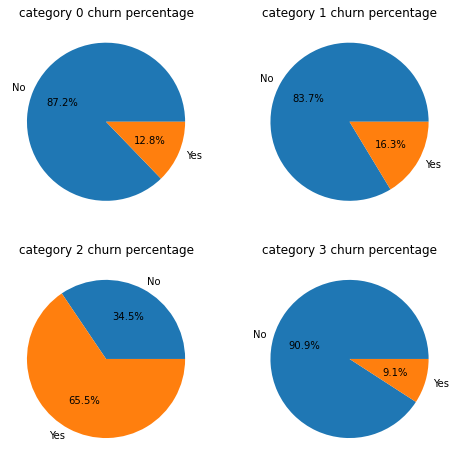

In [62]:
fig = plt.figure(figsize=(8,8))

plt.subplot(2, 2, 1)
plt.pie([3193,468],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 0 churn percentage")

plt.subplot(2, 2, 2)
plt.pie([1142,223],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 1 churn percentage")

plt.subplot(2, 2, 3)
plt.pie([388,738],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 2 churn percentage")

plt.subplot(2, 2, 4)
plt.pie([25218,2538],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 3 churn percentage")

plt.show()


# Inference 

# --------------------------------------------------------------------------------------------------------------

In [63]:
#labels vs feature_14

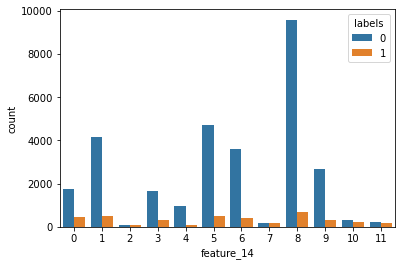

In [64]:
sns.countplot(df.feature_14,hue=df.labels)

In [65]:
de=df[["feature_14","labels"]]
dd=de.groupby(["feature_14","labels"])['labels'].value_counts()

In [66]:
dd.first

<bound method NDFrame.first of feature_14  labels  labels
0           0       0         1757
            1       1          436
1           0       0         4164
            1       1          508
2           0       0           76
            1       1           74
3           0       0         1681
            1       1          332
4           0       0          966
            1       1          105
5           0       0         4704
            1       1          483
6           0       0         3598
            1       1          423
7           0       0          169
            1       1          182
8           0       0         9580
            1       1          693
9           0       0         2700
            1       1          305
10          0       0          314
            1       1          231
11          0       0          232
            1       1          195
Name: labels, dtype: int64>

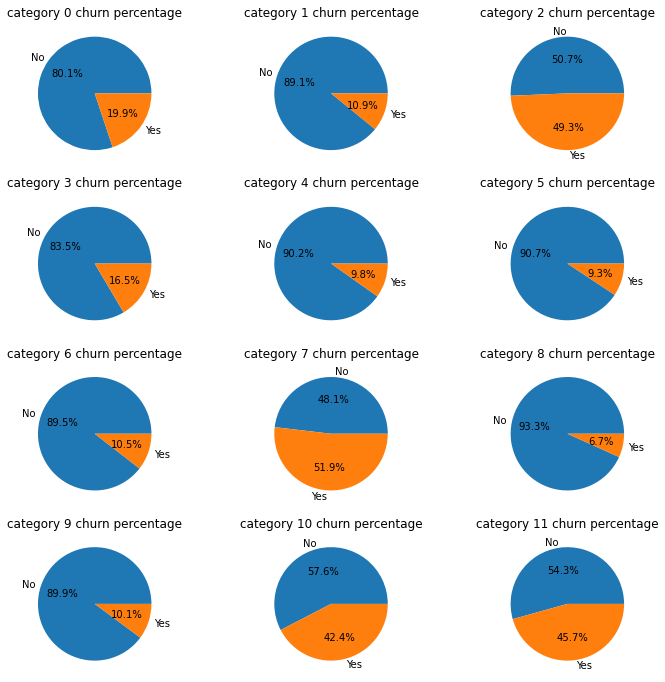

In [67]:
fig = plt.figure(figsize=(12,12))

plt.subplot(4, 3, 1)
plt.pie([1757,436],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 0 churn percentage")
plt.subplot(4, 3, 2)
plt.pie([4164,508],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 1 churn percentage")
plt.subplot(4, 3, 3)
plt.pie([76,74],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 2 churn percentage")
plt.subplot(4, 3, 4)
plt.pie([1681,332],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 3 churn percentage")
plt.subplot(4, 3, 5)
plt.pie([966,105],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 4 churn percentage")
plt.subplot(4, 3, 6)
plt.pie([4704,483],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 5 churn percentage")
plt.subplot(4, 3, 7)
plt.pie([3598,423],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 6 churn percentage")
plt.subplot(4, 3, 8)
plt.pie([169,182],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 7 churn percentage")
plt.subplot(4, 3, 9)
plt.pie([9580,693],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 8 churn percentage")
plt.subplot(4, 3, 10)
plt.pie([2700,305],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 9 churn percentage")
plt.subplot(4, 3, 11)
plt.pie([314,231],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 10 churn percentage")
plt.subplot(4, 3, 12)
plt.pie([232,195],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 11 churn percentage")
plt.show()

# Inference

# ---------------------------------------------------------------------------------------------------------------

In [68]:
#labels vs feature_13

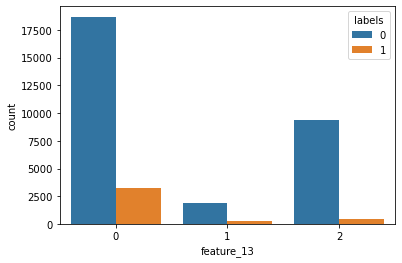

In [69]:
sns.countplot(df.feature_13,hue=df.labels)

In [70]:
de=df[["feature_13","labels"]]
dd=de.groupby(["feature_13","labels"])['labels'].value_counts()
dd.first

<bound method NDFrame.first of feature_13  labels  labels
0           0       0         18695
            1       1          3283
1           0       0          1894
            1       1           285
2           0       0          9352
            1       1           399
Name: labels, dtype: int64>

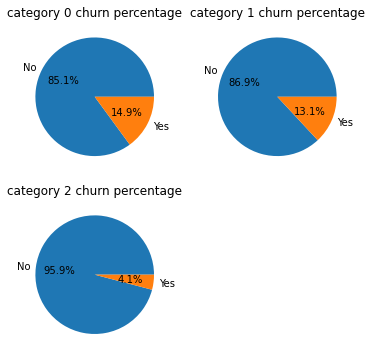

In [71]:
fig = plt.figure(figsize=(6,6))

plt.subplot(2, 2, 1)
plt.pie([18695,3283],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 0 churn percentage")
plt.subplot(2, 2, 2)
plt.pie([1894,285],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 1 churn percentage")
plt.subplot(2, 2, 3)
plt.pie([9352,399],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 2 churn percentage")
plt.show()

# Inference 

# --------------------------------------------------------------------------------------------------------------

In [72]:
#labels vs feature_12

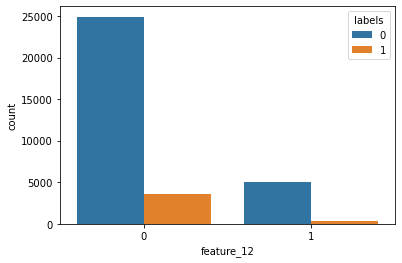

In [73]:
sns.countplot(df.feature_12,hue=df.labels)

In [74]:
de=df[["feature_12","labels"]]
dd=de.groupby(["feature_12","labels"])['labels'].value_counts()
dd.first

<bound method NDFrame.first of feature_12  labels  labels
0           0       0         24899
            1       1          3595
1           0       0          5042
            1       1           372
Name: labels, dtype: int64>

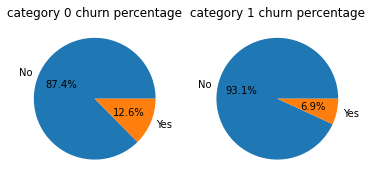

In [75]:
fig = plt.figure(figsize=(6,6))

plt.subplot(1, 2, 1)
plt.pie([24899,3595],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 0 churn percentage")
plt.subplot(1, 2, 2)
plt.pie([5042,372],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 1 churn percentage")
plt.show()

# Inference

# ---------------------------------------------------------------------------------------------------------------

In [76]:
#labels vs feature_11

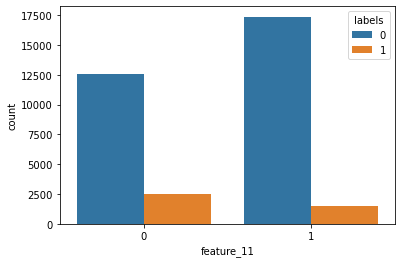

In [77]:
sns.countplot(df.feature_11,hue=df.labels)

In [78]:
de=df[["feature_11","labels"]]
dd=de.groupby(["feature_11","labels"])['labels'].value_counts()
dd.first

<bound method NDFrame.first of feature_11  labels  labels
0           0       0         12574
            1       1          2498
1           0       0         17367
            1       1          1469
Name: labels, dtype: int64>

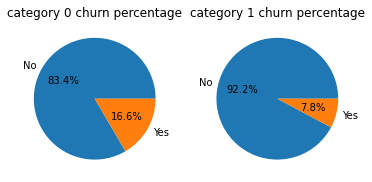

In [79]:
fig = plt.figure(figsize=(6,6))

plt.subplot(1, 2, 1)
plt.pie([12574,2498],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 0 churn percentage")
plt.subplot(1, 2, 2)
plt.pie([17367,1469],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 1 churn percentage")
plt.show()

# Inference 

# ---------------------------------------------------------------------------------------------------------------

In [80]:
#labels vs feature_10

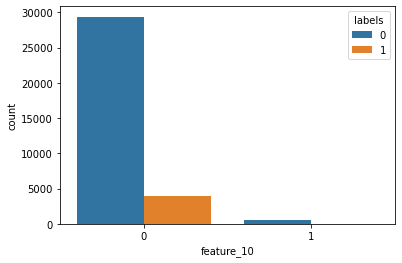

In [81]:
sns.countplot(df.feature_10,hue=df.labels)

In [82]:
de=df[["feature_10","labels"]]
dd=de.groupby(["feature_10","labels"])['labels'].value_counts()
dd.first

<bound method NDFrame.first of feature_10  labels  labels
0           0       0         29364
            1       1          3929
1           0       0           577
            1       1            38
Name: labels, dtype: int64>

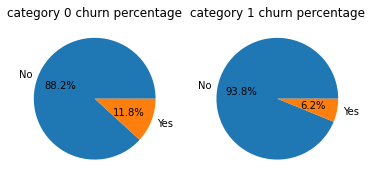

In [83]:
fig = plt.figure(figsize=(6,6))

plt.subplot(1, 2, 1)
plt.pie([29364,3929],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 0 churn percentage")
plt.subplot(1, 2, 2)
plt.pie([577,38],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 1 churn percentage")
plt.show()

# Inference

# --------------------------------------------------------------------------------------------------------------

In [84]:
#labels vs feature_9

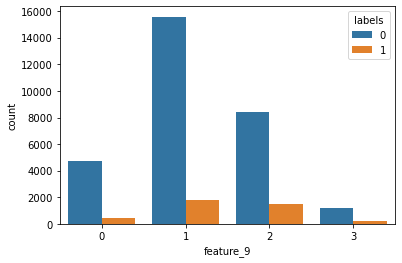

In [85]:
sns.countplot(df.feature_9,hue=df.labels)

In [86]:
de=df[["feature_9","labels"]]
dd=de.groupby(["feature_9","labels"])['labels'].value_counts()
dd.first

<bound method NDFrame.first of feature_9  labels  labels
0          0       0          4699
           1       1           448
1          0       0         15574
           1       1          1806
2          0       0          8448
           1       1          1526
3          0       0          1220
           1       1           187
Name: labels, dtype: int64>

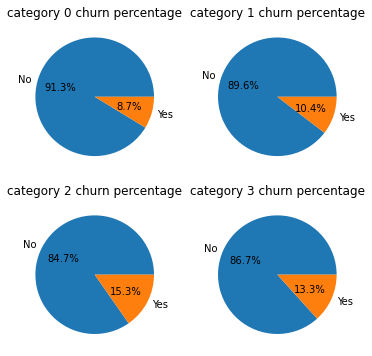

In [87]:
fig = plt.figure(figsize=(6,6))

plt.subplot(2, 2, 1)
plt.pie([4699,448],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 0 churn percentage")
plt.subplot(2, 2, 2)
plt.pie([15574,1806],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 1 churn percentage")
plt.subplot(2, 2, 3)
plt.pie([8448,1526],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 2 churn percentage")
plt.subplot(2, 2, 4)
plt.pie([1220,187],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 3 churn percentage")
plt.show()

# Inference 

# ---------------------------------------------------------------------------------------------------------------

In [88]:
#labels vs feature_8

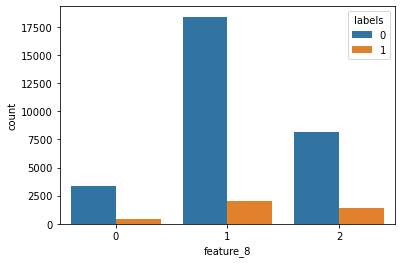

In [89]:
sns.countplot(df.feature_8,hue=df.labels)

In [90]:
de=df[["feature_8","labels"]]
dd=de.groupby(["feature_8","labels"])['labels'].value_counts()
dd.first

<bound method NDFrame.first of feature_8  labels  labels
0          0       0          3371
           1       1           466
1          0       0         18383
           1       1          2051
2          0       0          8187
           1       1          1450
Name: labels, dtype: int64>

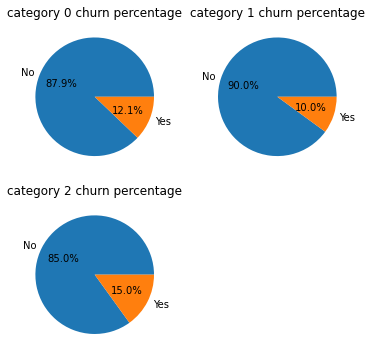

In [91]:
fig = plt.figure(figsize=(6,6))

plt.subplot(2, 2, 1)
plt.pie([3371,466],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 0 churn percentage")
plt.subplot(2, 2, 2)
plt.pie([18383, 2051],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 1 churn percentage")
plt.subplot(2, 2, 3)
plt.pie([8187,1450],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 2 churn percentage")

plt.show()

# Inference 

# ------------------------------------------------------------------------------------------------------------

In [92]:
#labels vs feature_7

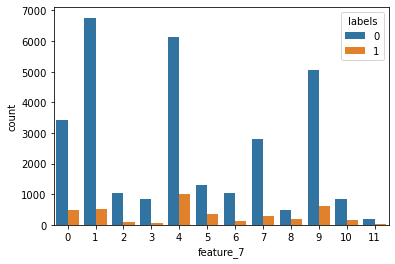

In [93]:
sns.countplot(df.feature_7,hue=df.labels)

In [94]:
de=df[["feature_7","labels"]]
dd=de.groupby(["feature_7","labels"])['labels'].value_counts()
dd.first

<bound method NDFrame.first of feature_7  labels  labels
0          0       0         3417
           1       1          474
1          0       0         6756
           1       1          530
2          0       0         1026
           1       1           92
3          0       0          860
           1       1           78
4          0       0         6125
           1       1         1012
5          0       0         1314
           1       1          369
6          0       0         1028
           1       1          136
7          0       0         2816
           1       1          278
8          0       0          498
           1       1          202
9          0       0         5069
           1       1          622
10         0       0          836
           1       1          152
11         0       0          196
           1       1           22
Name: labels, dtype: int64>

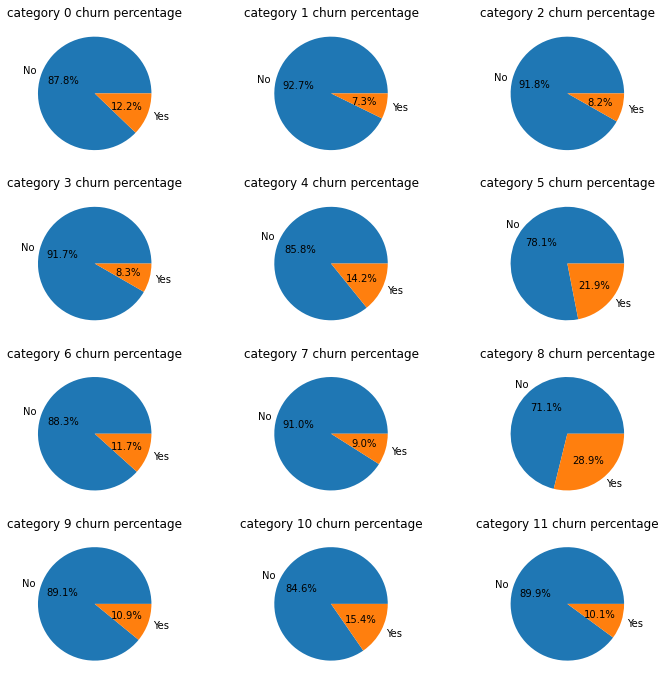

In [95]:
fig = plt.figure(figsize=(12,12))

plt.subplot(4, 3, 1)
plt.pie([3417,474],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 0 churn percentage")
plt.subplot(4, 3, 2)
plt.pie([6756,530],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 1 churn percentage")
plt.subplot(4, 3, 3)
plt.pie([1026,92],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 2 churn percentage")
plt.subplot(4, 3, 4)
plt.pie([860,78],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 3 churn percentage")
plt.subplot(4, 3, 5)
plt.pie([6125,1012],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 4 churn percentage")
plt.subplot(4, 3, 6)
plt.pie([1314,369],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 5 churn percentage")
plt.subplot(4, 3, 7)
plt.pie([1028,136],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 6 churn percentage")
plt.subplot(4, 3, 8)
plt.pie([2816,278],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 7 churn percentage")
plt.subplot(4, 3, 9)
plt.pie([498,202],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 8 churn percentage")
plt.subplot(4, 3, 10)
plt.pie([5069,622],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 9 churn percentage")
plt.subplot(4, 3, 11)
plt.pie([836,152],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 10 churn percentage")
plt.subplot(4, 3, 12)
plt.pie([196,22],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 11 churn percentage")
plt.show()

# Inference 

# --------------------------------------------------------------------------------------------------------------

In [96]:
#labels vs feature_6

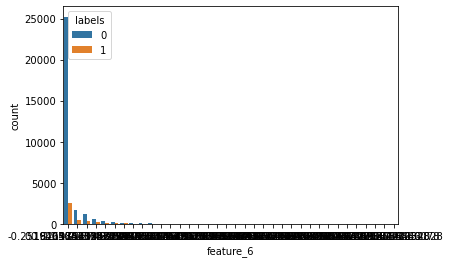

In [97]:
sns.countplot(df.feature_6,hue=df.labels)

In [98]:
de=df[["feature_6","labels"]]
dd=de.groupby(["feature_6","labels"])['labels'].value_counts()
dd.first

<bound method NDFrame.first of feature_6   labels  labels
-0.251940   0       0         25215
            1       1          2537
 0.182198   0       0          1643
            1       1           450
 0.616335   0       0          1221
            1       1           336
 1.050473   0       0           637
            1       1           214
 1.484611   0       0           410
            1       1           129
 1.918749   0       0           253
            1       1            88
 2.352887   0       0           150
            1       1            59
 2.787025   0       0           110
            1       1            37
 3.221163   0       0            62
            1       1            33
 3.655301   0       0            50
            1       1            21
 4.089439   0       0            27
            1       1            22
 4.523577   0       0            35
            1       1            10
 4.957714   0       0            21
            1       1             9
 5.391

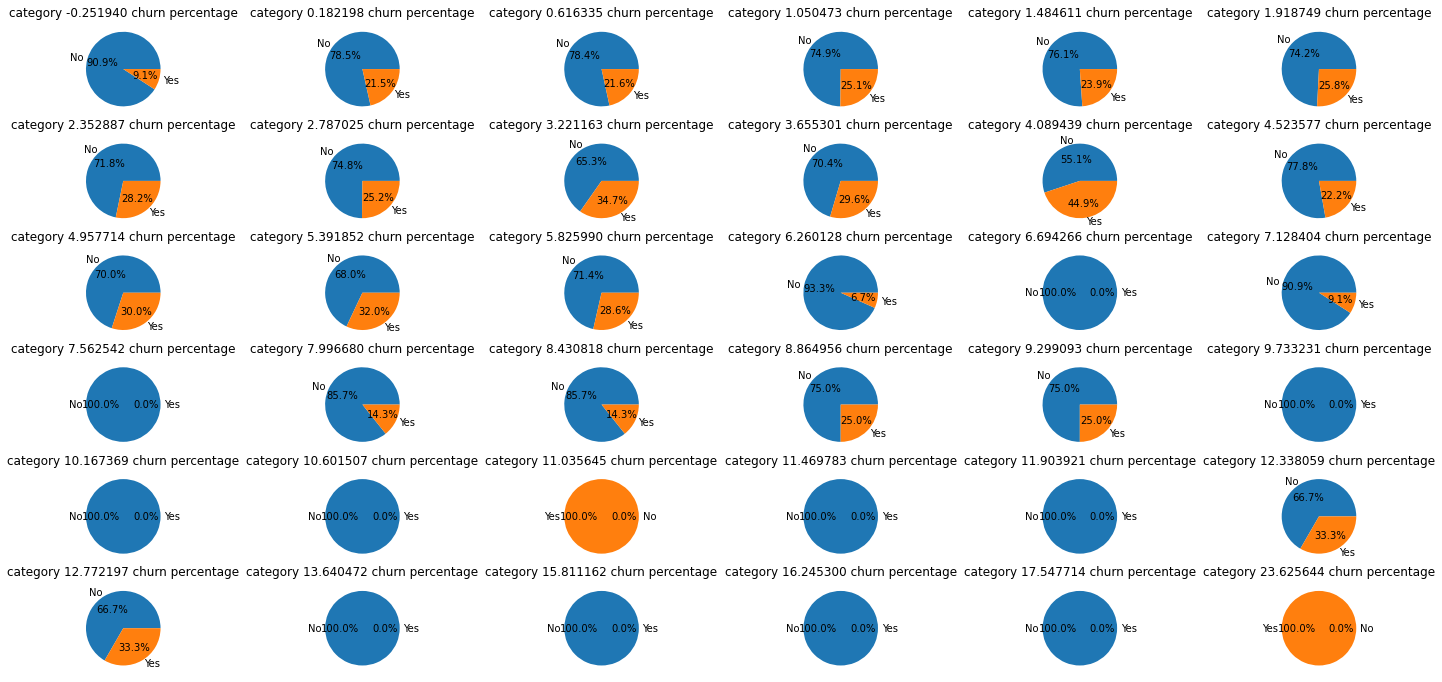

In [99]:
fig = plt.figure(figsize=(25,12))

plt.subplot(6, 6, 1)
plt.pie([25215,2537],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category -0.251940 churn percentage")
plt.subplot(6, 6, 2)
plt.pie([1643,450],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 0.182198 churn percentage")
plt.subplot(6, 6, 3)
plt.pie([1221,336],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 0.616335 churn percentage")
plt.subplot(6, 6, 4)
plt.pie([637,214],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 1.050473 churn percentage")
plt.subplot(6, 6, 5)
plt.pie([410,129],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 1.484611 churn percentage")
plt.subplot(6, 6, 6)
plt.pie([253,88],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 1.918749 churn percentage")
plt.subplot(6, 6, 7)
plt.pie([150,59],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 2.352887 churn percentage")
plt.subplot(6, 6, 8)
plt.pie([110,37],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 2.787025 churn percentage")
plt.subplot(6, 6, 9)
plt.pie([62,33],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 3.221163 churn percentage")
plt.subplot(6, 6, 10)
plt.pie([50,21],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 3.655301 churn percentage")
plt.subplot(6, 6, 11)
plt.pie([27,22],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 4.089439 churn percentage")
plt.subplot(6, 6, 12)
plt.pie([35,10],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 4.523577 churn percentage")
plt.subplot(6, 6, 13)
plt.pie([21,9],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 4.957714 churn percentage")
plt.subplot(6, 6, 14)
plt.pie([17,8],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 5.391852 churn percentage")
plt.subplot(6, 6, 15)
plt.pie([10,4],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 5.825990 churn percentage")
plt.subplot(6, 6, 16)
plt.pie([14,1],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 6.260128 churn percentage")
plt.subplot(6, 6, 17)
plt.pie([9,0],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 6.694266 churn percentage")
plt.subplot(6, 6, 18)
plt.pie([10,1],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 7.128404 churn percentage")
plt.subplot(6, 6, 19)
plt.pie([3,0],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 7.562542 churn percentage")
plt.subplot(6, 6, 20)
plt.pie([6,1],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 7.996680 churn percentage")
plt.subplot(6, 6, 21)
plt.pie([6,1],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 8.430818 churn percentage")
plt.subplot(6, 6, 22)
plt.pie([3,1],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 8.864956 churn percentage")
plt.subplot(6, 6, 23)
plt.pie([3,1],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 9.299093 churn percentage")
plt.subplot(6, 6, 24)
plt.pie([4,0],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 9.733231 churn percentage")
plt.subplot(6, 6, 25)
plt.pie([4,0],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 10.167369 churn percentage")
plt.subplot(6, 6, 26)
plt.pie([4,0],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 10.601507 churn percentage")
plt.subplot(6, 6, 27)
plt.pie([0,1],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 11.035645 churn percentage")
plt.subplot(6, 6, 28)
plt.pie([3,0],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 11.469783 churn percentage")
plt.subplot(6, 6, 29)
plt.pie([2,0],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 11.903921 churn percentage")
plt.subplot(6, 6, 30)
plt.pie([2,1],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 12.338059 churn percentage")
plt.subplot(6, 6, 31)
plt.pie([2,1],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 12.772197 churn percentage")
plt.subplot(6, 6, 32)
plt.pie([1,0],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 13.640472 churn percentage")
plt.subplot(6, 6, 33)
plt.pie([2,0],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 15.811162 churn percentage")
plt.subplot(6, 6, 34)
plt.pie([1,0],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 16.245300 churn percentage")
plt.subplot(6, 6, 35)
plt.pie([1,0],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 17.547714 churn percentage")
plt.subplot(6, 6, 36)
plt.pie([0,1],labels=["No","Yes"],autopct="%1.1f%%")
plt.title("category 23.625644 churn percentage")

plt.show()

# Inference 

# --------------------------------------------------------------------------------------------------------------

In [100]:
#labels vs feature_5

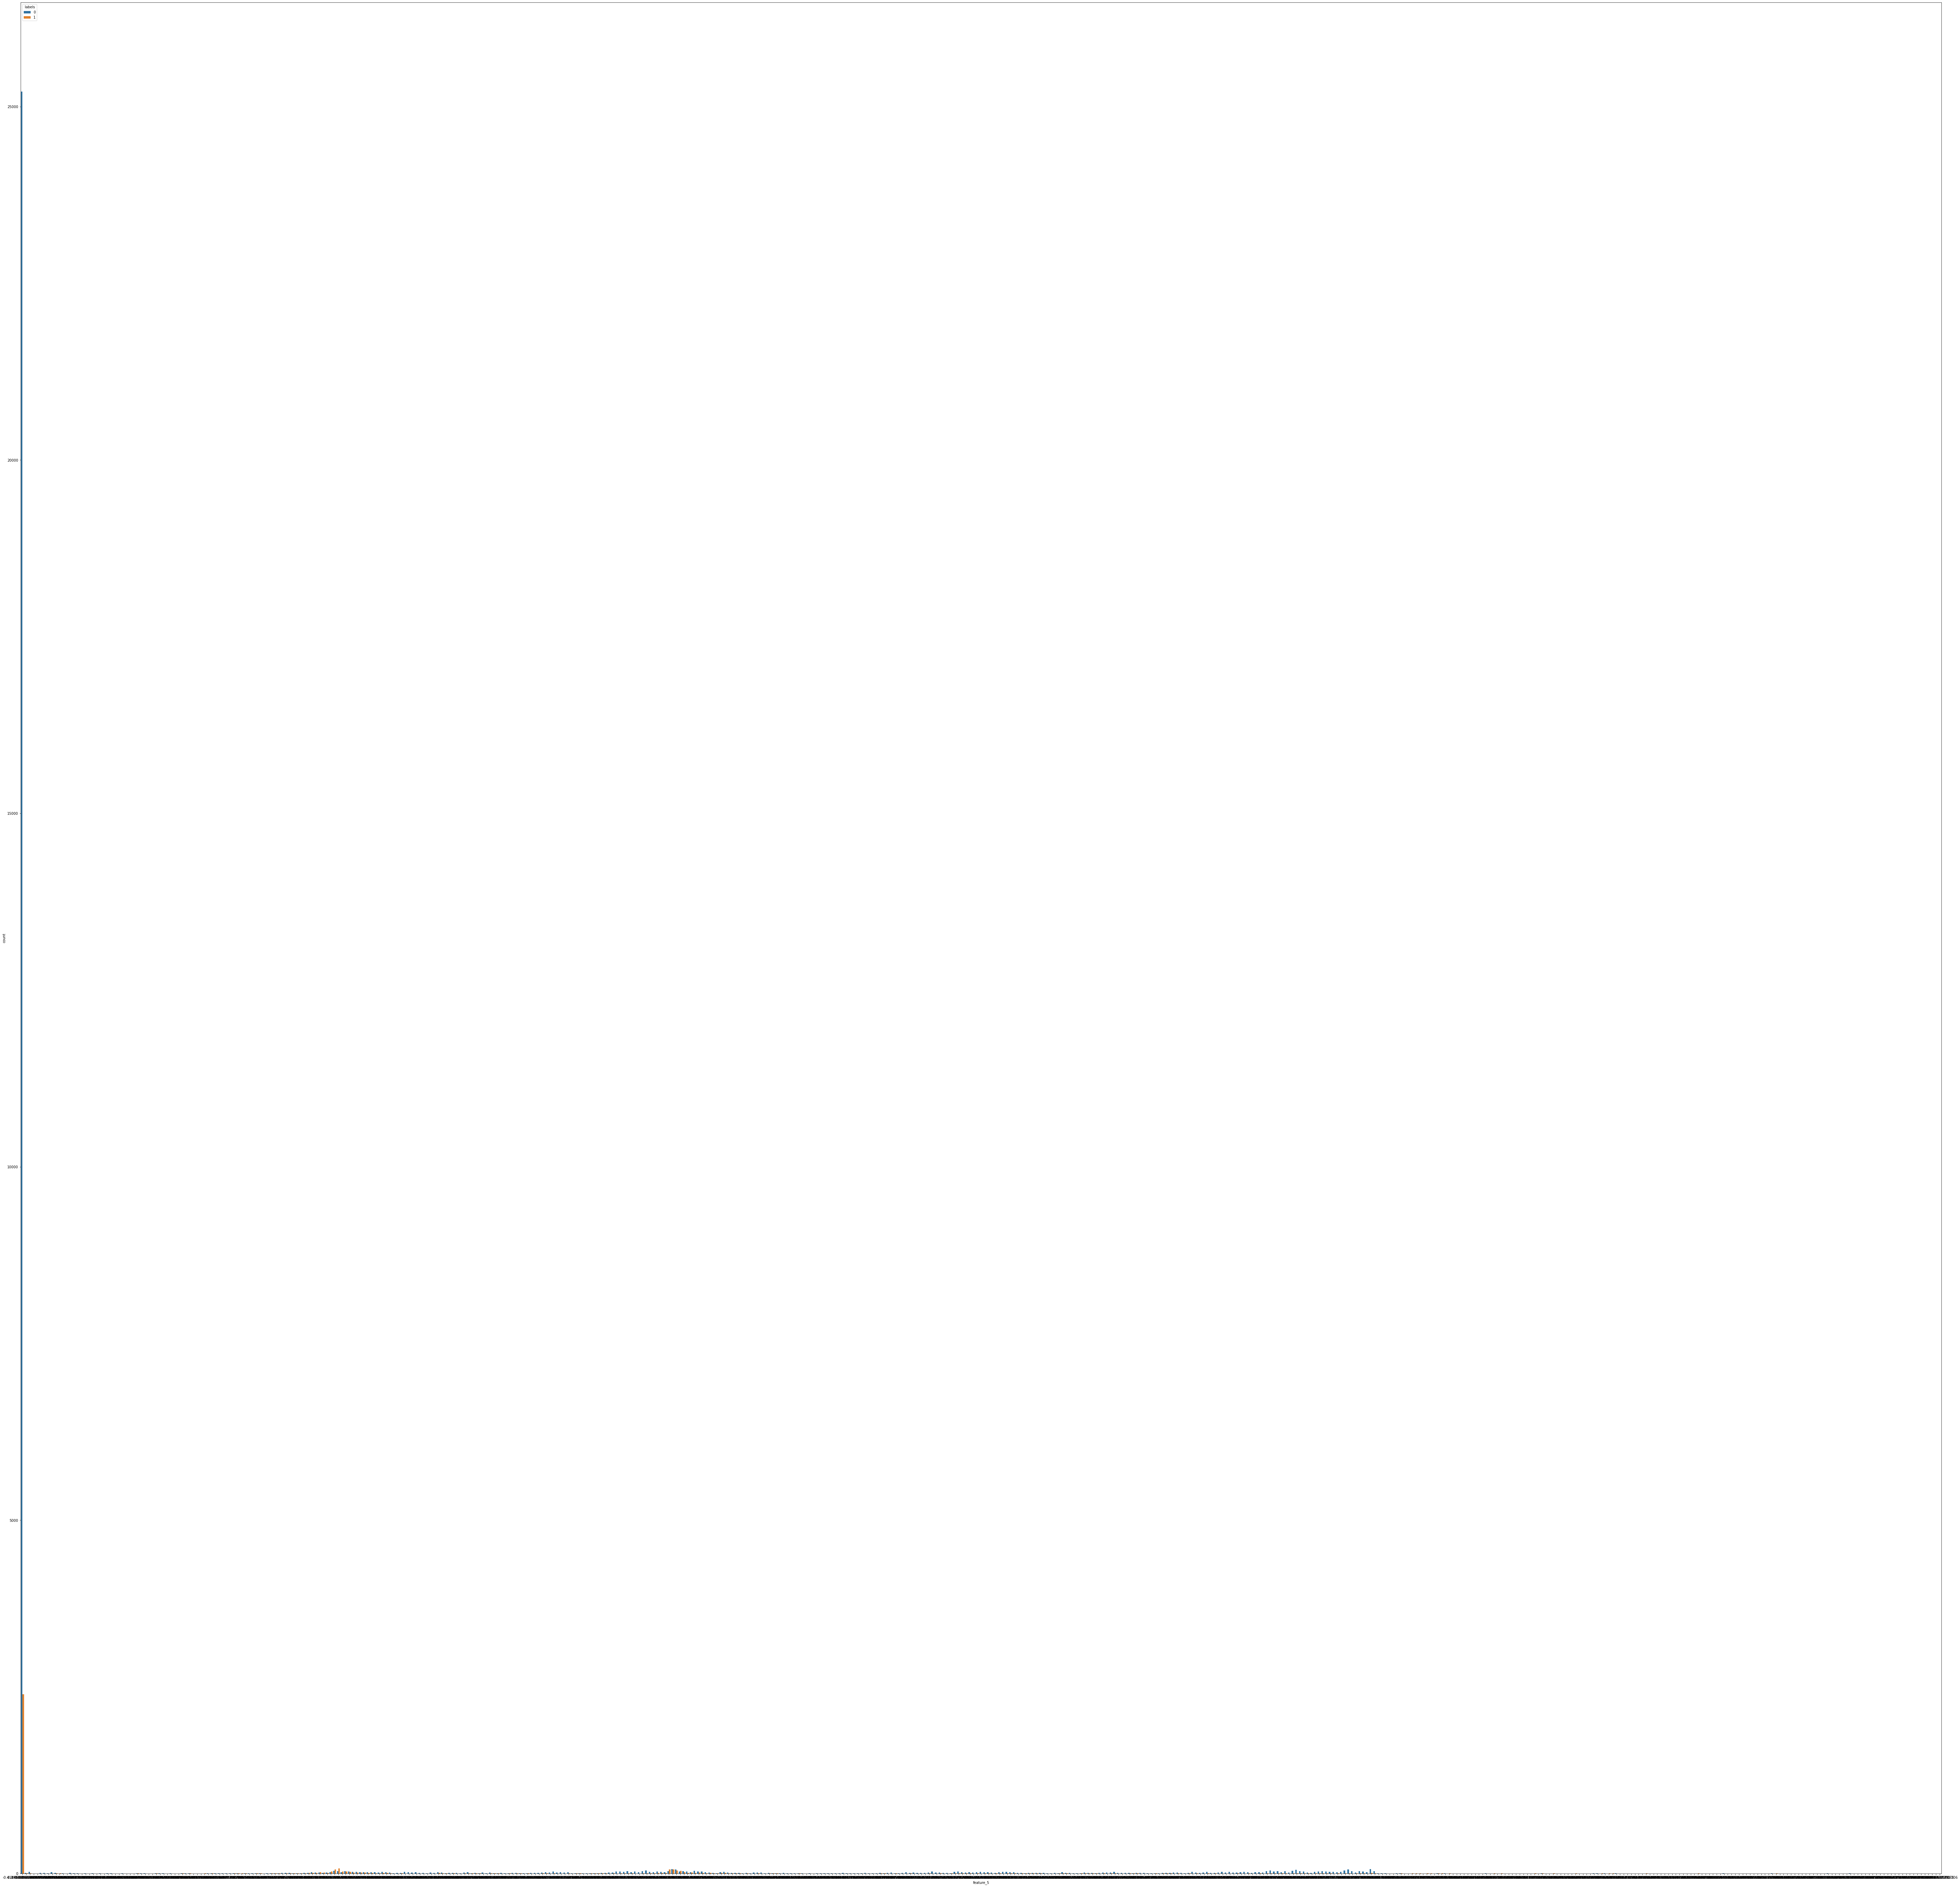

In [101]:
fig,ax=plt.subplots(figsize=(100,100))
sns.countplot(df.feature_5,hue=df.labels)

In [102]:
de=df[["feature_5","labels"]]
dd=de.groupby(["feature_5","labels"])['labels'].value_counts()
dd.first

<bound method NDFrame.first of feature_5  labels  labels
-0.411453  0       0         25215
           1       1          2537
-0.391479  0       0             8
           1       1             5
-0.381491  0       0            23
                             ...  
 7.848005  0       0             1
 7.867979  1       1             1
 7.897941  0       0             1
 8.007801  1       1             1
 8.127648  1       1             1
Name: labels, Length: 838, dtype: int64>

# Inference 

# --------------------------------------------------------------------------------------------------------------

In [103]:
#labels vs feature_3
de=df[["feature_3","labels"]]
dd=de.groupby(["labels"])['feature_3'].mean()
dd.first

<bound method NDFrame.first of labels
0   -0.143450
1    1.082241
Name: feature_3, dtype: float64>

# Inference 

# --------------------------------------------------------------------------------------------------------------

In [104]:
#labels vs feature_2

In [105]:
len(df.labels.unique())

2

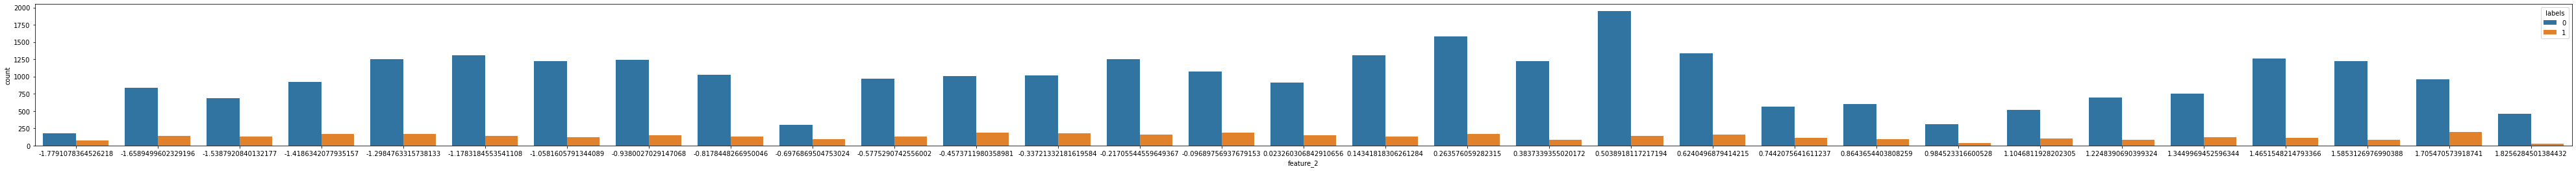

In [106]:
fig,ax=plt.subplots(figsize=(70,4))
sns.countplot(df.feature_2,hue=df.labels)

# --------------------------------------------------------------------------------------------------------------

In [107]:
#labels vs feature_1
de=df[["feature_1","labels"]]
dd=de.groupby(["labels"])['feature_1'].mean()
dd.first

<bound method NDFrame.first of labels
0   -0.015363
1    0.138036
Name: feature_1, dtype: float64>

# ------------------------------------------------------------------------------------------------------------

In [108]:
#labels vs feature_0
de=df[["feature_0","labels"]]
dd=de.groupby(["labels"])['feature_0'].mean()
dd.first

<bound method NDFrame.first of labels
0   -0.011220
1    0.049142
Name: feature_0, dtype: float64>

# --------------------------------------------------------------------------------------------------------

# Multivariate 

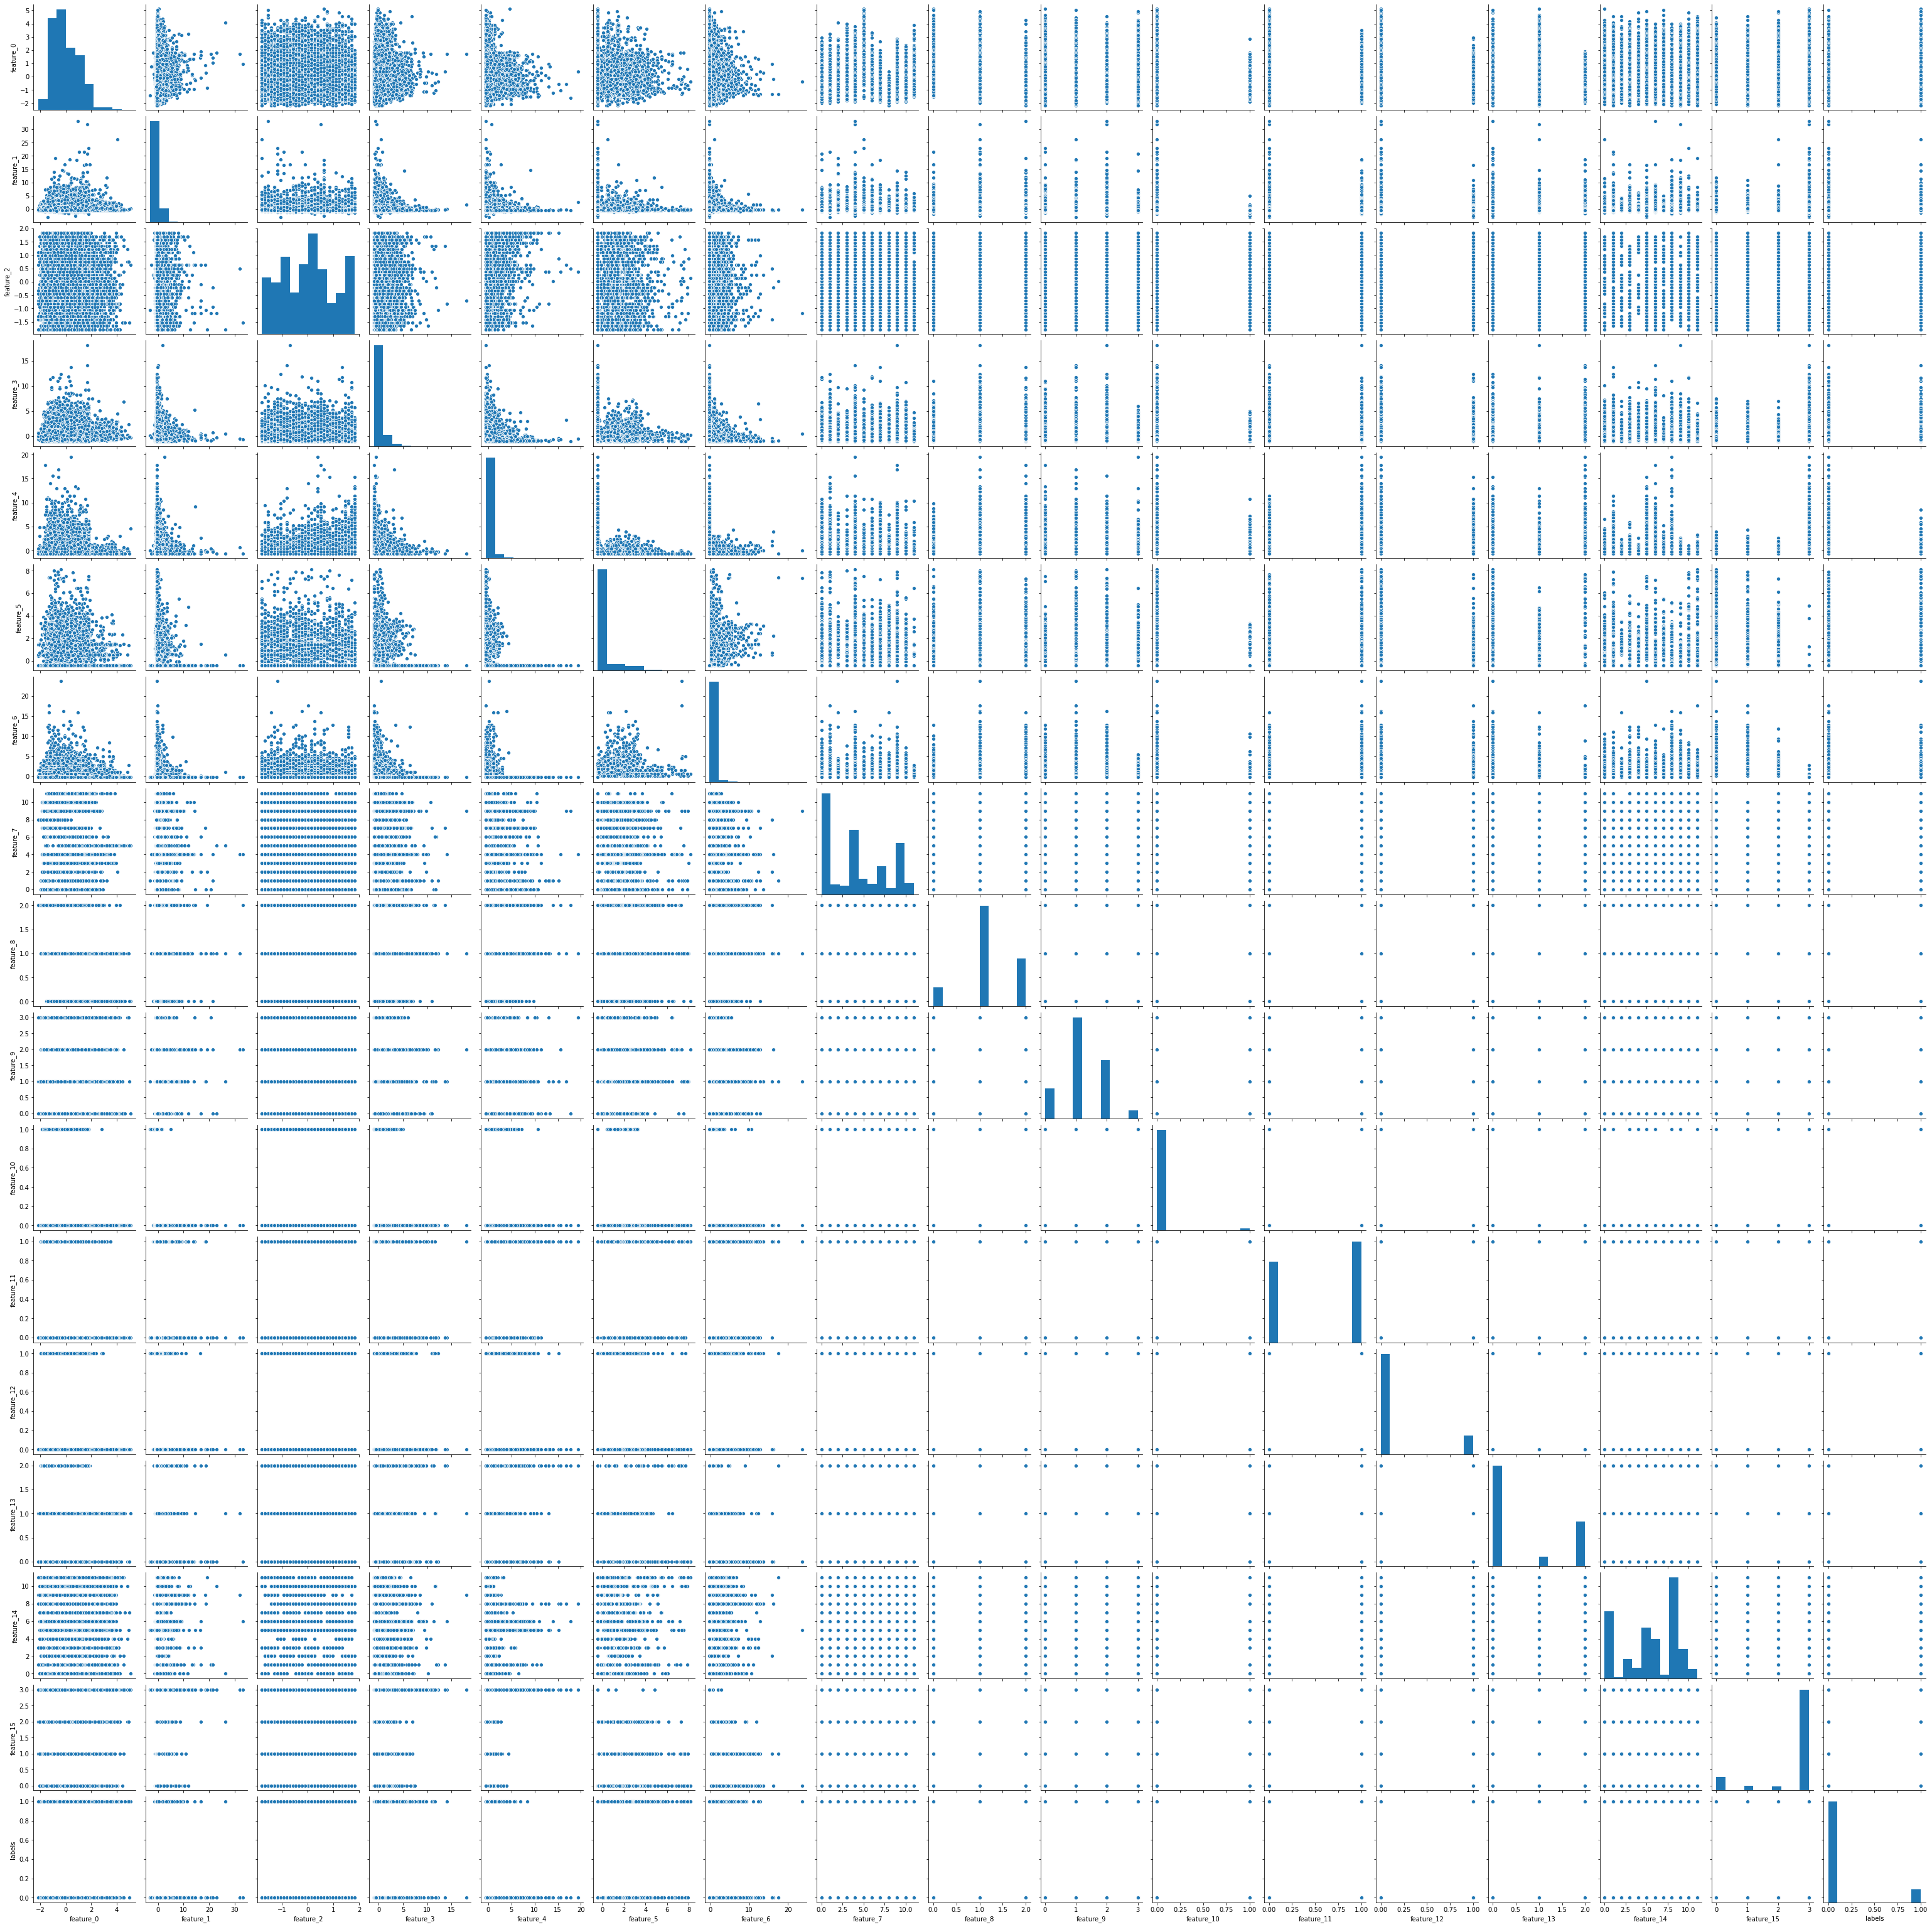

In [109]:
sns.pairplot(df)

# Feature selection 

In [110]:
df.corr()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
feature_0    1.000000   0.096391  -0.011224  -0.007262   0.003125  -0.021076   
feature_1    0.096391   1.000000   0.005365   0.017720  -0.013162   0.004524   
feature_2   -0.011224   0.005365   1.000000  -0.031505   0.162574  -0.095046   
feature_3   -0.007262   0.017720  -0.031505   1.000000  -0.084617   0.001482   
feature_4    0.003125  -0.013162   0.162574  -0.084617   1.000000  -0.091533   
feature_5   -0.021076   0.004524  -0.095046   0.001482  -0.091533   1.000000   
feature_6    0.003105   0.021292  -0.055874   0.001489  -0.045145   0.547919   
feature_7   -0.020858   0.018648   0.023044   0.000688   0.007676  -0.022786   
feature_8   -0.406850  -0.000714  -0.006331   0.011788  -0.009894   0.017101   
feature_9   -0.105244   0.065006   0.022440   0.003468   0.004970   0.003437   
feature_10  -0.020580  -0.066072   0.012235  -0.010831   0.017115  -0.027930   
feature_11  -0.182078  -0.070495  -0.027770   0.009210  -0.020753   0.122215   
feature_12  -0.015597  -0.083485   0.007430  -0.009263   0.005064  -0.022871   
feature_13   0.028699  -0.030686  -0.029314  -0.020733   0.024970  -0.243657   
feature_14  -0.040374   0.015220  -0.005105   0.006277  -0.109652   0.031530   
feature_15   0.006381  -0.021289   0.084358   0.009662   0.105265  -0.856851   
labels       0.019405   0.048611  -0.033345   0.392971  -0.075025   0.106239   

            feature_6  feature_7  feature_8  feature_9  feature_10  \
feature_0    0.003105  -0.020858  -0.406850  -0.105244   -0.020580   
feature_1    0.021292   0.018648  -0.000714   0.065006   -0.066072   
feature_2   -0.055874   0.023044  -0.006331   0.022440    0.012235   
feature_3    0.001489   0.000688   0.011788   0.003468   -0.010831   
feature_4   -0.045145   0.007676  -0.009894   0.004970    0.017115   
feature_5    0.547919  -0.022786   0.017101   0.003437   -0.027930   
feature_6    1.000000   0.001753   0.019752   0.021266   -0.018799   
feature_7    0.001753   1.000000   0.058998   0.163618   -0.007553   
feature_8    0.019752   0.058998   1.000000   0.108495   -0.005900   
feature_9    0.021266   0.163618   0.108495   1.000000   -0.013744   
feature_10  -0.018799  -0.007553  -0.005900  -0.013744    1.000000   
feature_11   0.039526  -0.124799  -0.014665  -0.090923   -0.005174   
feature_12  -0.010990  -0.034169  -0.046986  -0.046003    0.078315   
feature_13  -0.176610  -0.080982  -0.035879  -0.112665    0.013976   
feature_14   0.030134  -0.091335  -0.005906  -0.058534    0.013017   
feature_15  -0.594264   0.009890  -0.015697  -0.022458    0.032717   
labels       0.119322   0.038588   0.046193   0.068356   -0.023344   

            feature_11  feature_12  feature_13  feature_14  feature_15  \
feature_0    -0.182078   -0.015597    0.028699   -0.040374    0.006381   
feature_1    -0.070495   -0.083485   -0.030686    0.015220   -0.021289   
feature_2    -0.027770    0.007430   -0.029314   -0.005105    0.084358   
feature_3     0.009210   -0.009263   -0.020733    0.006277    0.009662   
feature_4    -0.020753    0.005064    0.024970   -0.109652    0.105265   
feature_5     0.122215   -0.022871   -0.243657    0.031530   -0.856851   
feature_6     0.039526   -0.010990   -0.176610    0.030134   -0.594264   
feature_7    -0.124799   -0.034169   -0.080982   -0.091335    0.009890   
feature_8    -0.014665   -0.046986   -0.035879   -0.005906   -0.015697   
feature_9    -0.090923   -0.046003   -0.112665   -0.058534   -0.022458   
feature_10   -0.005174    0.078315    0.013976    0.013017    0.032717   
feature_11    1.000000    0.042371    0.188053    0.267342   -0.099257   
feature_12    0.042371    1.000000   -0.010203    0.025174    0.016092   
feature_13    0.188053   -0.010203    1.000000    0.361038    0.270935   
feature_14    0.267342    0.025174    0.361038    1.000000   -0.033727   
feature_15   -0.099257    0.016092    0.270935   -0.033727    1.000000   
labels       -0.135662   -0.065480   -0.148583   -0.

# Feature selection by p-value method 

In [116]:
dffeature=df.copy()

In [117]:
X=dffeature.drop('labels',axis=1)
y=dffeature.labels

In [1]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

NameError: name 'X' is not defined

In [119]:

import statsmodels.discrete.discrete_model as sm
import statsmodels.api as sn
X_cons1 = sn.add_constant(X_train)
logit1 = sm.Logit(y_train,X_cons1).fit()
logit1.summary()

Optimization terminated successfully.
         Current function value: 0.267417
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 labels   No. Observations:                22718
Model:                          Logit   Df Residuals:                    22701
Method:                           MLE   Df Model:                           16
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                  0.2574
Time:                        17:38:53   Log-Likelihood:                -6075.2
converged:                       True   LL-Null:                       -8180.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0848      0.140    -22.006      0.000      -3.360      -2.810
feature_0      0.0729      0.025      2.916      0.004       0.024       0.122
feature_1      0.0421      0.019      2.173      0.030       0.004       0.080
feature_2     -0.0645      0.024     -2.659      0.008      -0.112      -0.017
feature_3      1.0149      0.022     45.426      0.000       0.971       1.059
feature_4     -0.4224      0.045     -9.389      0.000      -0.511      -0.334
feature_5      0.3807      0.035     10.917      0.000       0.312       0.449
feature_6      0.2666      0.026     10.082      0.000       0.215       0.318
feature_7      0.0075      0.008      0.985      0.324      -0.007       0.022
feature_8      0.2093      0.044      4.802      0.000       0.124       0.295
feature_9      0.2276      0.032      7.004      0.000       0.164       0.291
feature_10    -0.3889      0.229     -1.695      0.090      -0.838       0.061
feature_11    -1.0059      0.053    -18.859      0.000      -1.110      -0.901
feature_12    -0.7696      0.082     -9.363      0.000      -0.931      -0.608
feature_13    -0.6477      0.038    -16.952      0.000      -0.723      -0.573
feature_14     0.0419      0.008      5.307      0.000       0.026       0.057
feature_15     0.2714      0.040      6.711      0.000       0.192       0.351
==============================================================================
"""

### Removing features with p values more than 0.05

In [120]:
dff=dffeature.drop(['feature_7','feature_10'],axis=1)

In [121]:
dff.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_8', 'feature_9', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'labels'],
      dtype='object')